<a href="https://colab.research.google.com/github/AiProcess/torch_deep_rl/blob/main/00_getting_started_environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Get started with Environments, TED and transforms

**Author**: [Vincent Moens](https://github.com/vmoens)


<div class="alert alert-info"><h4>Note</h4><p>To run this tutorial in a notebook, add an installation cell
  at the beginning containing:

```
!pip install tensordict
!pip install torchrl</p></div>
```


In [1]:
!pip install tensordict
!pip install torchrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 569.2 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64

Welcome to the getting started tutorials!

Below is the list of the topics we will be covering.

- `Environments, TED and transforms <gs_env_ted>`;
- `TorchRL's modules <gs_modules>`;
- `Losses and optimization <gs_optim>`;
- `Data collection and storage <gs_storage>`;
- `TorchRL's logging API <gs_logging>`.

If you are in a hurry, you can jump straight away to the last tutorial,
`Your own first training loop <gs_first_training>`, from where you can
backtrack every other "Getting Started" tutorial if things are not clear or
if you want to learn more about a specific topic!

## Environments in RL

The standard RL (Reinforcement Learning) training loop involves a model,
also known as a policy, which is trained to accomplish a task within a
specific environment. Often, this environment is a simulator that accepts
actions as input and produces an observation along with some metadata as
output.

In this document, we will explore the environment API of TorchRL: we will
learn how to create an environment, interact with it, and understand the
data format it uses.

## Creating an environment

In essence, TorchRL does not directly provide environments, but instead
offers wrappers for other libraries that encapsulate the simulators. The
:mod:`~torchrl.envs` module can be viewed as a provider for a generic
environment API, as well as a central hub for simulation backends like
[gym](https://arxiv.org/abs/1606.01540) (:class:`~torchrl.envs.GymEnv`),
[Brax](https://arxiv.org/abs/2106.13281) (:class:`~torchrl.envs.BraxEnv`)
or [DeepMind Control Suite](https://arxiv.org/abs/1801.00690)
(:class:`~torchrl.envs.DMControlEnv`).

Creating your environment is typically as straightforward as the underlying
backend API allows. Here's an example using gym:



In [2]:
from torchrl.envs import GymEnv

env = GymEnv("Pendulum-v1")

## Running an environment

Environments in TorchRL have two crucial methods:
:meth:`~torchrl.envs.EnvBase.reset`, which initiates
an episode, and :meth:`~torchrl.envs.EnvBase.step`, which executes an
action selected by the actor.
In TorchRL, environment methods read and write
:class:`~tensordict.TensorDict` instances.
Essentially, :class:`~tensordict.TensorDict` is a generic key-based data
carrier for tensors.
The benefit of using TensorDict over plain tensors is that it enables us to
handle simple and complex data structures interchangeably. As our function
signatures are very generic, it eliminates the challenge of accommodating
different data formats. In simpler terms, after this brief tutorial,
you will be capable of operating on both simple and highly complex
environments, as their user-facing API is identical and simple!

Let's put the environment into action and see what a tensordict instance
looks like:



In [3]:
reset = env.reset()
print(reset)

TensorDict(
    fields={
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now let's take a random action in the action space. First, sample the action:



In [4]:
reset_with_action = env.rand_action(reset)
print(reset_with_action)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


This tensordict has the same structure as the one obtained from
:meth:`~torchrl.envs.EnvBase` with an additional ``"action"`` entry.
You can access the action easily, like you would do with a regular
dictionary:




In [5]:
print(reset_with_action["action"])

tensor([0.8712])


We now need to pass this action tp the environment.
We'll be passing the entire tensordict to the ``step`` method, since there
might be more than one tensor to be read in more advanced cases like
Multi-Agent RL or stateless environments:



In [6]:
stepped_data = env.step(reset_with_action)
print(stepped_data)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminat

In [7]:
print(stepped_data["next"])

TensorDict(
    fields={
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        reward: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


In [8]:
print(stepped_data["next"]["done"])
print(stepped_data["next"]["observation"])
print(stepped_data["next"]["reward"])

tensor([False])
tensor([-0.9693,  0.2459, -0.0955])
tensor([-8.4150])


Again, this new tensordict is identical to the previous one except for the
fact that it has a ``"next"`` entry (itself a tensordict!) containing the
observation, reward and done state resulting from
our action.

We call this format TED, for
`TorchRL Episode Data format <TED-format>`. It is
the ubiquitous way of representing data in the library, both dynamically like
here, or statically with offline datasets.

The last bit of information you need to run a rollout in the environment is
how to bring that ``"next"`` entry at the root to perform the next step.
TorchRL provides a dedicated :func:`~torchrl.envs.utils.step_mdp` function
that does just that: it filters out the information you won't need and
delivers a data structure corresponding to your observation after a step in
the Markov Decision Process, or MDP.



In [9]:
from torchrl.envs import step_mdp

data = step_mdp(stepped_data)
print(data)

TensorDict(
    fields={
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


In [10]:
print(data["done"])
print(data["observation"])

tensor([False])
tensor([-0.9693,  0.2459, -0.0955])


## Environment rollouts


Writing down those three steps (computing an action, making a step,
moving in the MDP) can be a bit tedious and repetitive. Fortunately,
TorchRL provides a nice :meth:`~torchrl.envs.EnvBase.rollout` function that
allows you to run them in a closed loop at will:




In [11]:
rollout = env.rollout(max_steps=10)
print(rollout)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([10]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, 

This data looks pretty much like the ``stepped_data`` above with the
exception of its batch-size, which now equates the number of steps we
provided through the ``max_steps`` argument. The magic of tensordict
doesn't end there: if you're interested in a single transition of this
environment, you can index the tensordict like you would index a tensor:



In [12]:
transition = rollout[3]
print(transition)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminat

In [13]:
print(rollout["action"])

tensor([[-0.2680],
        [ 1.8304],
        [-0.9895],
        [-1.1551],
        [-1.3690],
        [ 1.3188],
        [-0.4153],
        [ 0.1258],
        [-1.9243],
        [ 1.6211]])


In [14]:
print(rollout["next"])

TensorDict(
    fields={
        done: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        observation: Tensor(shape=torch.Size([10, 3]), device=cpu, dtype=torch.float32, is_shared=False),
        reward: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        terminated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([10, 1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([10]),
    device=None,
    is_shared=False)


In [15]:
print(rollout["next"]["reward"])

tensor([[ -2.6965],
        [ -3.1686],
        [ -4.0919],
        [ -5.0661],
        [ -6.2208],
        [ -7.5085],
        [ -9.3864],
        [-11.1293],
        [-12.6008],
        [-10.7543]])


:class:`~tensordict.TensorDict` will automatically check if the index you
provided is a key (in which case we index along the key-dimension) or a
spatial index like here.

Executed as such (without a policy), the ``rollout`` method may seem rather
useless: it just runs random actions. If a policy is available, it can
be passed to the method and used to collect data.

Nevertheless, it can useful to run a naive, policyless rollout at first to
check what is to be expected from an environment at a glance.

To appreciate the versatility of TorchRL's API, consider the fact that the
rollout method is universally applicable. It functions across **all** use
cases, whether you're working with a single environment like this one,
multiple copies across various processes, a multi-agent environment, or even
a stateless version of it!


## Transforming an environment

Most of the time, you'll want to modify the output of the environment to
better suit your requirements. For example, you might want to monitor the
number of steps executed since the last reset, resize images, or stack
consecutive observations together.

In this section, we'll examine a simple transform, the
:class:`~torchrl.envs.transforms.StepCounter` transform.
The complete list of transforms can be found
`here <transforms>`.

The transform is integrated with the environment through a
:class:`~torchrl.envs.transforms.TransformedEnv`:




In [16]:
from torchrl.envs import StepCounter, TransformedEnv

transformed_env = TransformedEnv(env, StepCounter(max_steps=20))
rollout = transformed_env.rollout(max_steps=100)
print(rollout)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([20, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([20, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([20, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([20, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([20, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                step_count: Tensor(shape=torch.Size([20, 1]), device=cpu, dtype=torch.int64, is_shared=False),
                terminated: Tensor(shape=torch.Size([20, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([20, 1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([20]),
            device=None,
       

As you can see, our environment now has one more entry, ``"step_count"`` that
tracks the number of steps since the last reset.
Given that we passed the optional
argument ``max_steps=10`` to the transform constructor, we also truncated the
trajectory after 10 steps (not completing a full rollout of 100 steps like
we asked with the ``rollout`` call). We can see that the trajectory was
truncated by looking at the truncated entry:



In [17]:
print(rollout["step_count"])

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]])


In [18]:
print(rollout["next","step_count"])

tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20]])


In [19]:
print(rollout[11]["next", "step_count"])

tensor([12])


In [20]:
print(rollout["next", "truncated"])

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True]])


This is all for this short introduction to TorchRL's environment API!

## Next steps

To explore further what TorchRL's environments can do, go and check:

- The :meth:`~torchrl.envs.EnvBase.step_and_maybe_reset` method that packs
  together :meth:`~torchrl.envs.EnvBase.step`,
  :func:`~torchrl.envs.utils.step_mdp` and
  :meth:`~torchrl.envs.EnvBase.reset`.
- Some environments like :class:`~torchrl.envs.GymEnv` support rendering
  through the ``from_pixels`` argument. Check the class docstrings to know
  more!
- The batched environments, in particular :class:`~torchrl.envs.ParallelEnv`
  which allows you to run multiple copies of one same (or different!)
  environments on multiple processes.
- Design your own environment with the
  `Pendulum tutorial <pendulum_tuto>` and learn about specs and
  stateless environments.
- See the more in-depth tutorial about environments
  `in the dedicated tutorial <envs_tuto>`;
- Check the
  `multi-agent  environment API <MARL-environment-API>`
  if you're interested in MARL;
- TorchRL has many tools to interact with the Gym API such as
  a way to register TorchRL envs in the Gym register through
  :meth:`~torchrl.envs.EnvBase.register_gym`, an API to read
  the info dictionaries through
  :meth:`~torchrl.envs.EnvBase.set_info_dict_reader` or a way
  to control the gym backend thanks to
  :func:`~torchrl.envs.set_gym_backend`.




### step_and_maybe_reset

In [21]:
stepped_data = env.step(reset_with_action)
print(stepped_data)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
                reward: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
                terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
            batch_size=torch.Size([]),
            device=None,
            is_shared=False),
        observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
        terminat

In [25]:
env.step_and_maybe_reset(reset)

(TensorDict(
     fields={
         action: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
         done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
         next: TensorDict(
             fields={
                 done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                 observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
                 reward: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.float32, is_shared=False),
                 terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
                 truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
             batch_size=torch.Size([]),
             device=None,
             is_shared=False),
         observation: Tensor(shape=torch.Size([3]), device=cpu, dtype=torch.float32, is_shared=False),
 

### Rendering through the `from_pixels` argument


In [28]:
from torchrl.envs import GymEnv

env = GymEnv("Pendulum-v1", from_pixels=True)
env_reset = env.reset()
print(env_reset)

TensorDict(
    fields={
        done: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        pixels: Tensor(shape=torch.Size([500, 500, 3]), device=cpu, dtype=torch.uint8, is_shared=False),
        terminated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False),
        truncated: Tensor(shape=torch.Size([1]), device=cpu, dtype=torch.bool, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)


In [31]:
env_frame = env_reset["pixels"]
env_frame.shape

torch.Size([500, 500, 3])

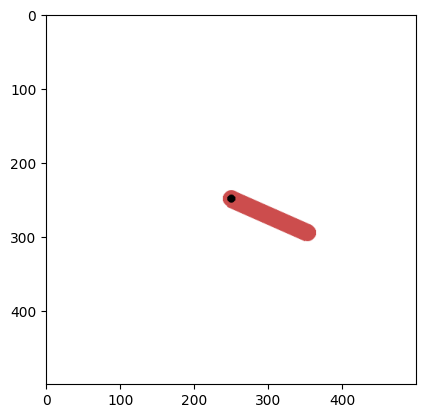

In [33]:
import matplotlib.pyplot as plt

plt.imshow(env_frame)

In [35]:
env_tensordict = env.rollout(max_steps=20)

In [43]:
frame, next_frame = env_tensordict[10]["pixels"], env_tensordict[10]["next", "pixels"]

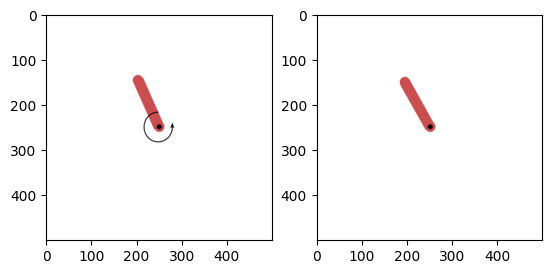

In [44]:
plt.subplot(121)
plt.imshow(frame)

plt.subplot(122)
plt.imshow(next_frame)

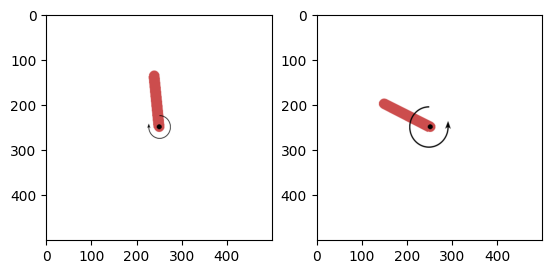

In [49]:
frame2, frame15 = env_tensordict[2]["pixels"], env_tensordict[15]["pixels"]
plt.subplot(121)
plt.imshow(frame2)

plt.subplot(122)
plt.imshow(frame15)